In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colorblind friendly colormap
custom_cmap = ListedColormap([
    '#e69f00',  
    '#0072b2', 
    '#cc79a7', 
    '#f0e442', 
    '#56b4e9', 
    '#009e73', 
    '#000000'
])

# Seed random generator for reproducibility
rng = np.random.default_rng(42)

# Set n samples we want
n_samples = 256

# Generate data
weights_m = rng.normal(80, 10, n_samples//2)
weights_f = rng.normal(65, 10, n_samples//2)

heights_m = weights_m + rng.normal(100, 20, n_samples//2)
heights_f = weights_f + rng.normal(90, 10, n_samples//2)

#is_male = np.ones(n_samples, dtype=np.int8)
#is_male[n_samples//2:]-=1

# Create dataframe from data
df_w2h = pd.DataFrame({"height": np.concatenate([heights_m, heights_f]), 
                       "weight": np.concatenate([weights_m, weights_f])})
df_w2h = df_w2h[~df_w2h['weight'].between(75, 80, inclusive='left')]
new_row = pd.DataFrame({'height': [130, 220], 'weight': [75.1, 79.9]})
df_w2h = pd.concat([df_w2h, new_row], ignore_index=True)
print(df_w2h.head())

       height     weight
0  191.742492  83.047171
1  162.077038  69.600159
2  184.828053  87.504512
3  161.907731  89.405647
4  155.726173  60.489648


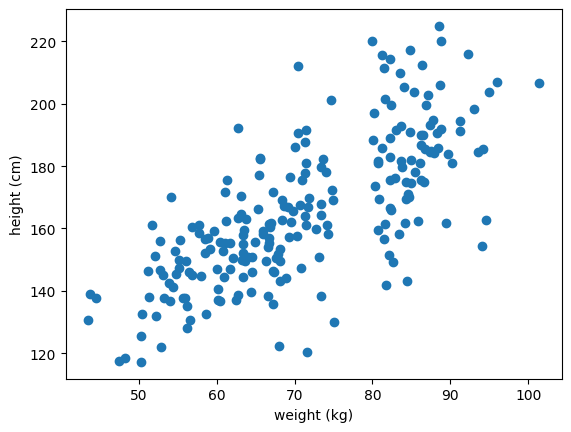

In [2]:
plt.figure()
plt.scatter(df_w2h.weight, df_w2h.height)
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.savefig("figs/k_nearest_dataset.png")
plt.show()

In [17]:
# Simple example with four weights measurements

# Our measurements
wts = np.array([1, 2, 3, 2])

# The average weight
mean=np.mean(wts)

# The number of measurements
N = len(wts)

# Deviations from the mean
devs=(wts-mean)

# Average deviation from the mean weight
var_ = devs.sum()/N
print(var_)

0.0


In [19]:
# Squaring the deviations
devs_2 = devs**2

# Now computing variance 
var = sum(devs_2)/N
print(var)

0.5


In [23]:
# Compute \bar{V} for our weights data
mean_w = sum(df_w2h.weight)/len(df_w2h)
print(f'mean: {mean_w}')

# Compute (V_i - \bar{V})^2
deviations = [(wi - mean_w)**2 for wi in df_w2h.weight]

# Compute variance
variance = sum(deviations) / len(df_w2h)
print(f'variance: {variance}')


mean: 71.27545672240207
variance: 162.7917952074835


In [38]:
# Compute variance using pandas
print(df_w2h.weight.var())

163.53175791297207


In [44]:
# Computing covariance between weight and height
cov_w_h = df_w2h['weight'].cov(df_w2h['height'])
print(cov_w_h)

215.11776578233534


In [45]:
# Taking the square root of the variance to find the standard deviation
print(f'hand calculated standard deviation: {np.sqrt(df_w2h.weight.var())}')

# Also computing standard deviation directly using pandas
print(f'using pandas: {df_w2h.weight.std()}')

hand calculated standard deviation: 12.78795362491482
using pandas: 12.78795362491482


In [46]:
# Calculate standard deviations for weight and height
std_w = df_w2h.weight.std()
std_h = df_w2h.height.std()

# Computing correlation
print(f'hand calculated correlation: {cov_w_h/(std_w*std_h)}')

print(f'using pandas: {df_w2h['weight'].corr(df_w2h['height'])}')

hand calculated correlation: 0.724696384323803
using pandas: 0.7246963843238032
